In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# 1) Load dataset
df = pd.read_csv("Salary_dataset.csv")
print("Raw Shape:", df.shape)
print(df.head())

print("\nMissing Values:\n", df.isnull().sum())

Raw Shape: (30, 3)
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Missing Values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [4]:
# 2) Clean data
df = df.drop_duplicates().dropna()
print("\nCleaned Shape:", df.shape)


Cleaned Shape: (30, 3)


In [5]:
# 3) Features + Target
X = df[['YearsExperience']]
y = df['Salary']

In [6]:
# 5) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 6) Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 7) Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# 8) Predict + evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.4f}    R²: {r2:.4f}")


MSE: 49830096.8559    R²: 0.9024


In [10]:
# 9) Actual vs Predicted
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
results["Error"] = results["Actual"] - results["Predicted"]
print(results.head())

     Actual      Predicted         Error
0  112636.0  115791.210113  -3155.210113
1   67939.0   71499.278095  -3560.278095
2  113813.0  102597.868661  11215.131339
3   83089.0   75268.804224   7820.195776
4   64446.0   55478.792045   8967.207955


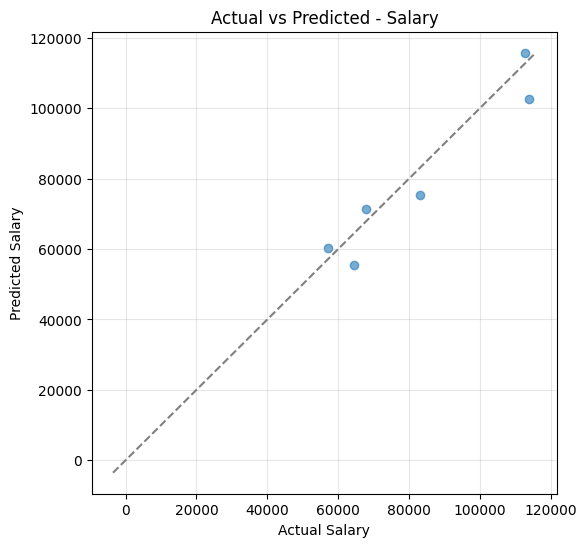

In [11]:
# 10) Plot
plt.figure(figsize=(6,6))
plt.scatter(results["Actual"], results["Predicted"], alpha=0.6)
plt.plot([min(results.min()), max(results.max())],
         [min(results.min()), max(results.max())],
         "--", color="gray")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted - Salary")
plt.grid(True, alpha=0.3)
plt.show()